In [6]:

from jupyterthemes import get_themes
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('chesterish')

from timeit import default_timer as timer


In [24]:
#Stuff to record-
#(1) Distribution of area of toppling affected by one sanddrop. 
#(2) Dsitribution of time of toppling due to one sanddrop. len(t)
#(3) Distribution of number of topplings on adding one sanddrop. (sum over elements of t)




def stabilitycheck(grid,dim,z_c):
    grid[:,:,1]=0                          #reset all the affected points
    s=1
    topplings=[]                          #topplings after adding a single grain of sand
    while(s!=0):
        unstable=[]
        for i in range(1,dim+1):
            for j in range(1,dim+1):
                if(grid[i,j,0]>=z_c):
                    unstable.append([i,j])
        s=len(unstable)
        topplings.append(s)
        for x in unstable:
            grid[x[0],x[1],0]=grid[x[0],x[1],0]-4
            grid[x[0]+1,x[1],0]=grid[x[0]+1,x[1],0]+1
            grid[x[0]-1,x[1],0]=grid[x[0]-1,x[1],0]+1
            grid[x[0],x[1]+1,0]=grid[x[0],x[1]+1,0]+1
            grid[x[0],x[1]-1,0]=grid[x[0],x[1]-1,0]+1
            
            #Area affected by toppling due to one sand grain.
            grid[x[0],x[1],1]=1
            grid[x[0]+1,x[1],1]=1
            grid[x[0]-1,x[1],1]=1
            grid[x[0],x[1]+1,1]=1
            grid[x[0],x[1]-1,1]=1
        

        
        grid[:,0,0]=0
        grid[0,:,0]=0
        grid[:,dim+1,0]=0
        grid[dim+1,:,0]=0
    #while loop ends
    
    i,j=1,1
    area=0
    for i in range(1,dim+1):
        for j in range(1,dim+1):
            if (grid[i,j,1]==1):
                area=area+1
    
    time=len(topplings)
    no_of_topplings=0
    for n in (topplings):
        no_of_topplings=no_of_topplings+n
    
    return grid, area, time, no_of_topplings,topplings

#len(topplings) is the duration of avalanche.


[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 1 0 0 1 0 0 1 2 2 0 1 3 1 3 3 0 1 1 3 2 0 1 0 2 0]
 [0 2 0 0 2 2 1 2 3 2 2 2 3 2 3 3 3 1 3 0 2 3 0 2 1 2 0]
 [0 0 0 2 0 1 1 2 3 2 1 1 3 3 1 1 1 3 3 3 1 0 3 0 2 0 0]
 [0 3 2 0 0 3 1 2 2 3 1 2 3 0 1 2 2 0 2 1 3 2 1 0 2 2 0]
 [0 3 1 0 1 0 2 2 3 1 1 3 2 0 3 0 2 3 2 3 0 3 3 1 3 0 0]
 [0 0 0 1 2 0 2 1 3 1 0 2 0 2 3 0 3 2 2 3 3 3 0 3 3 2 0]
 [0 3 2 0 3 3 3 1 2 2 0 0 3 0 1 0 1 2 0 0 1 1 2 0 0 2 0]
 [0 2 0 3 0 0 3 3 1 1 2 2 3 2 3 3 2 0 3 2 3 1 3 2 1 1 0]
 [0 0 3 3 3 3 3 2 0 1 0 3 3 2 3 2 2 2 3 3 3 2 3 1 0 3 0]
 [0 2 1 0 2 1 1 2 1 1 2 0 3 2 0 2 2 0 1 3 0 3 0 3 2 2 0]
 [0 2 3 3 2 3 2 2 1 1 3 3 2 0 1 0 1 1 3 2 1 0 2 2 1 0 0]
 [0 2 3 0 3 2 0 3 2 0 2 3 0 1 3 0 2 1 3 1 2 1 0 1 1 2 0]
 [0 0 1 3 1 2 2 3 3 1 0 1 3 1 0 0 1 2 0 2 2 3 2 2 3 0 0]
 [0 3 0 2 3 3 2 2 0 2 2 2 3 0 1 0 3 3 2 1 3 2 1 3 1 0 0]
 [0 0 3 1 2 2 1 0 0 0 3 2 1 2 0 1 2 3 3 1 2 0 1 1 1 1 0]
 [0 2 0 1 1 0 1 3 2 2 1 1 2 2 2 1 0 1 1 1 2 0 2 1 0 1 0]
 [0 0 1 0 1 1 2 3 0 3 3 2 2 2 0

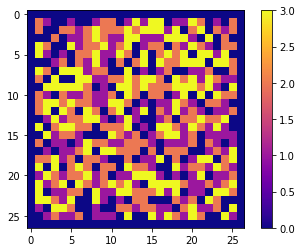

In [25]:
import numpy as np
import matplotlib.pyplot as plt

dim=25
z_c=4
grid_1d=np.zeros((dim + 2)*(dim + 2)*2, dtype=int)
grid=np.reshape(grid_1d,(dim+2,dim+2,2))
for i in range(1, dim+1):
    for j in range(1,dim+1):
        grid[i,j,0]=int(np.random.random()*4)
#Boundary_Conditions
grid[:,0,0]=0
grid[0,:,0]=0
grid[:,dim+1,0]=0
grid[dim+1,:,0]=0

print(grid[:,:,0])
print(grid[dim//2,dim//2,0])

plt.imshow(grid[:,:,0],'plasma')
plt.colorbar()

In [26]:
time=10
no_of_topples=[] #append in the proper lists
relaxation_time=[]
area_of_topple=[]
start = timer()
for t in range(0,time):
    grid_new = stabilitycheck(dropsand(grid,dim),dim,z_c)[0].copy() 
    area=stabilitycheck(dropsand(grid,dim),dim,z_c)[1]
    time=stabilitycheck(dropsand(grid,dim),dim,z_c)[2]
    no_of_topplings= stabilitycheck(dropsand(grid,dim),dim,z_c)[3]
    print(stabilitycheck(dropsand(grid,dim),dim,z_c)[4])
    no_of_topples.append(no_of_topplings)
    relaxation_time.append(time)
    area_of_topple.append(area)
    grid=grid_new.copy()   
end = timer()
print("Runtime= ", end-start)
print (no_of_topples)
print (relaxation_time)
print (area_of_topple)

[1, 0]
[0]
[0]
[0]
[1, 2, 2, 2, 1, 0]
[1, 1, 1, 1, 1, 0]
[0]
[0]
[1, 2, 1, 1, 2, 4, 2, 1, 1, 0]
[1, 1, 1, 0]
Runtime=  0.04785830000014357
[14, 1, 0, 0, 0, 8, 5, 0, 0, 15]
[1, 9, 2, 1, 1, 1, 6, 6, 1, 1]
[0, 0, 34, 5, 0, 0, 0, 20, 14, 0]


In [18]:
print(area_of_topple[120])
print(no_of_topples[120])
    

8
0


In [3]:
!jt -r

Reset css and font defaults in:
C:\Users\kunal\.jupyter\custom &
C:\Users\kunal\AppData\Roaming\jupyter\nbextensions
